In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/data/train_all_tasks.csv")
df.head()

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none


In [3]:
df = df[df['label_sexist'] == 'sexist']
df.head(10)

,rewire_id,text,label_sexist,label_category,label_vector
8,sexism2022_english-10142,"just the inside of your wallet: cash, bank car...",sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
11,sexism2022_english-760,They get the initial chance because they are a...,sexist,2. derogation,2.1 descriptive attacks
17,sexism2022_english-1108,ugly chicks A pussy is a pussy.,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
18,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
19,sexism2022_english-10014,How about I talk shit to an idiot like you? Ar...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."
21,sexism2022_english-10606,If you want to attack culture and norms you ha...,sexist,4. prejudiced discussions,4.2 supporting systemic discrimination against...
24,sexism2022_english-16370,"Nah, black women still get more replies on tin...",sexist,4. prejudiced discussions,4.2 supporting systemic discrimination against...
25,sexism2022_english-4429,dumb ass women today ask more why you are not ...,sexist,2. derogation,2.2 aggressive and emotive attacks
32,sexism2022_english-18545,Men can be whores also.,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."
33,sexism2022_english-11481,Husbands. Kill your piece of shit commie wives,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
X = df.text
tfid_vec = TfidfVectorizer().fit(X)
X_corpus =  tfid_vec.transform(X)

In [6]:
X_corpus.shape

(3398, 9084)

In [7]:
X = df.text
y = df.label_category
label_encoder = LabelEncoder().fit(y)
encoded_y = label_encoder.transform(y)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_corpus, encoded_y , random_state =42)

In [10]:
print(X_train.shape)
print(X_test.shape)

(2548, 9084)
(850, 9084)


**LOGISTIC REGRESSION**

In [11]:
from sklearn.linear_model import LogisticRegression

In [16]:
l_model = LogisticRegression()
l_model.fit(X_train, y_train)
l_sentiment_yhat = l_model.predict(X_test)
l_sentiment_accuracy = accuracy_score(y_true = y_test, y_pred = l_sentiment_yhat)
l_sentiment_f1 = f1_score(y_true = y_test, y_pred = l_sentiment_yhat, average = 'weighted')

In [17]:
print(f"The accuracy from logistic sentiment classification: {l_sentiment_accuracy}")
print(f"with f1 score: {l_sentiment_f1}")
print(classification_report(y_true = y_test, y_pred = l_sentiment_yhat ))

The accuracy from logistic sentiment classification: 0.5458823529411765
with f1 score: 0.5048308571255704
              precision    recall  f1-score   support

           0       0.83      0.27      0.41        70
           1       0.56      0.78      0.65       414
           2       0.48      0.43      0.45       281
           3       0.50      0.01      0.02        85

    accuracy                           0.55       850
   macro avg       0.59      0.37      0.39       850
weighted avg       0.55      0.55      0.50       850



Text(0.5, 1.0, 'Sentiment classification')

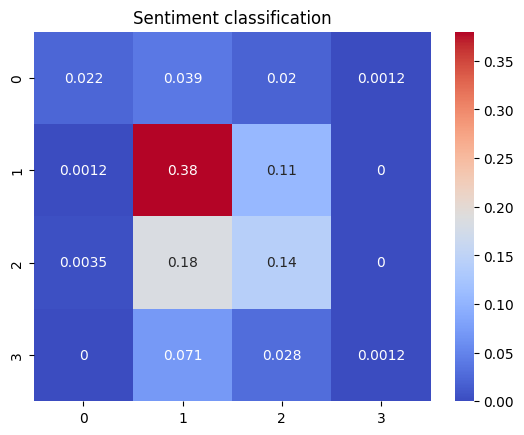

In [18]:
sns.heatmap(confusion_matrix(y_true= y_test, y_pred = l_sentiment_yhat) / len(l_sentiment_yhat), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

**Support Vector Classification SVC**

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_topic_yhat = svm_model.predict(X_test)
svm_topic_accuracy = accuracy_score(y_true = y_test, y_pred = svm_topic_yhat )
svm_topic_f1 = f1_score(y_true = y_test, y_pred = svm_topic_yhat, average = 'weighted')

In [21]:
print(f"The accuracy from SVM sentiment classification: {svm_topic_accuracy}")
print(f"with f1 score: {svm_topic_f1}")
print(classification_report(y_true = y_test, y_pred = svm_topic_yhat ))

The accuracy from SVM sentiment classification: 0.5317647058823529
with f1 score: 0.4576594243063603
              precision    recall  f1-score   support

           0       0.90      0.13      0.23        70
           1       0.52      0.89      0.66       414
           2       0.54      0.26      0.35       281
           3       0.00      0.00      0.00        85

    accuracy                           0.53       850
   macro avg       0.49      0.32      0.31       850
weighted avg       0.51      0.53      0.46       850



Text(0.5, 1.0, 'Sentiment classification')

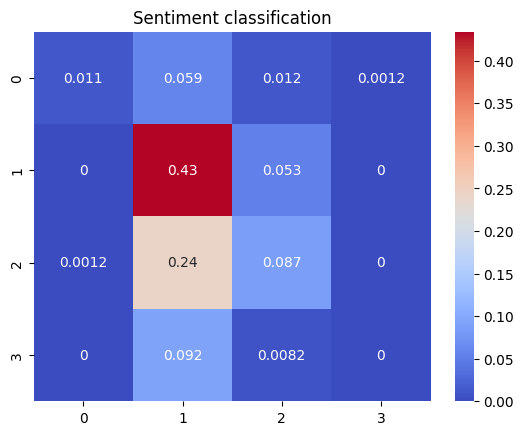

In [22]:
sns.heatmap(confusion_matrix(y_true= y_test, y_pred = svm_topic_yhat) / len(svm_topic_yhat), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

**RANDOM FOREST CLASSIFIER**

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_topic_yhat = rf_model.predict(X_test)
rf_topic_accuracy = accuracy_score(y_true = y_test, y_pred = rf_topic_yhat )
rf_topic_f1 = f1_score(y_true = y_test, y_pred = rf_topic_yhat, average = 'weighted')

In [27]:
print(f"The accuracy from SVM sentiment classification: {rf_topic_accuracy}")
print(f"with f1 score: {rf_topic_f1}")
print(classification_report(y_true = y_test, y_pred = rf_topic_yhat ))

The accuracy from SVM sentiment classification: 0.5352941176470588
with f1 score: 0.4763230074188368
              precision    recall  f1-score   support

           0       0.83      0.21      0.34        70
           1       0.53      0.85      0.65       414
           2       0.52      0.32      0.39       281
           3       0.00      0.00      0.00        85

    accuracy                           0.54       850
   macro avg       0.47      0.34      0.35       850
weighted avg       0.50      0.54      0.48       850



C:\Users\mufdu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mufdu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mufdu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

Text(0.5, 1.0, 'Sentiment classification')

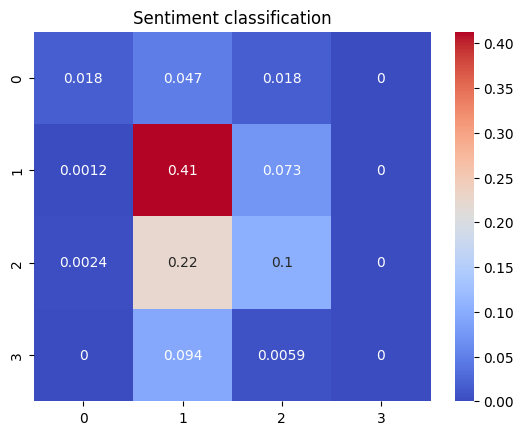

In [29]:
sns.heatmap(confusion_matrix(y_true= y_test, y_pred = rf_topic_yhat) / len(rf_topic_yhat), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')